In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':'12'})
rc('text', usetex=True)

from fractions import Fraction
import numpy as np
np.set_printoptions(precision=5, suppress=True)

In [2]:
def w(z, alpha):
    ro = np.power(z[0], alpha)
    psi = z[1]*alpha
    return (ro, psi)

def to_xy(z):
    return (z[0]*np.cos(z[1]), z[0]*np.sin(z[1]))

# Line, parabola, and friends

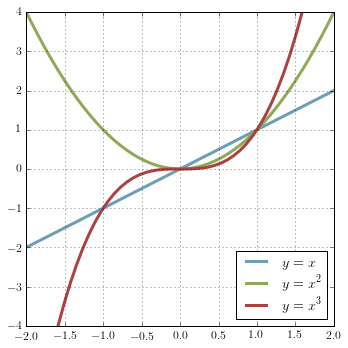

In [6]:
x = np.linspace(-2, 2)
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(x, x, label='$y = x$', lw=3, c='#6a9fb5')
ax.plot(x, x**2, label='$y = x^2$', lw=3, c='#90a959')
ax.plot(x, x**3, label='$y = x^3$', lw=3, c='#ac4142')
ax.grid(True)
ax.legend(loc='lower right')

ax.set_ylim(-4, 4)
fig.tight_layout()
fig.savefig('line-parabola.svg', dpi=600, bbox_inches='tight')

# Consider $w = z^\alpha$ for the circle $|z| = 4$ and powers $-2 \leq \alpha \leq 2$

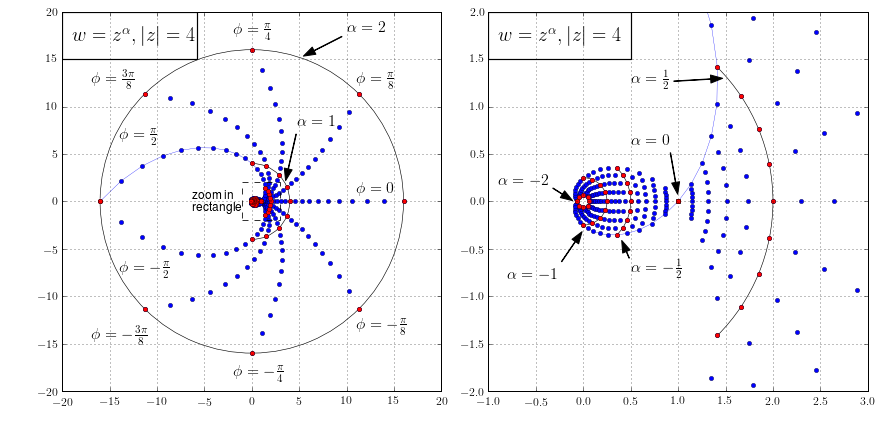

In [8]:
R = 4.0
N_phi = 9
a_max = 2.0
N_a = 41

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

aprops = dict(facecolor='black', shrink=0.05, width=0.4, headwidth=8.0)
for ax in axes:
    ax.grid(True)
    ax.set_aspect('equal')

    # Points
    alpha = np.linspace(-a_max, a_max, N_a)
    phi = np.linspace(-np.pi/a_max, np.pi/a_max, N_phi)
    # beta = np.r_[[Fraction(1,-a_max) + i*Fraction(1,N_phi-1) for i in range(N_phi)]]
    for angle in phi:
        points = [w((R, angle), power) for power in alpha]
        xy = np.r_[[to_xy(z) for z in points]]
        ax.scatter(xy[:, 0], xy[:, 1], lw=0.3)
    ax.plot(xy[:, 0], xy[:, 1], lw=0.3, zorder=-1)

    # Annotations
    ax.annotate(r'$\phi = 0$', xy=(16, 0), xytext=(11, 1), fontsize=16)

    ax.annotate(r'$\phi = \frac{\pi}{8}$', xy=(12, 12), xytext=(11, 12), fontsize=16)
    ax.annotate(r'$\phi = \frac{\pi}{4}$', xy=(0, 16), xytext=(-2, 17), fontsize=16)
    ax.annotate(r'$\phi = \frac{3\pi}{8}$', xy=(-12, 12), xytext=(-17, 12), fontsize=16)
    ax.annotate(r'$\phi = \frac{\pi}{2}$', xy=(-16, 0), xytext=(-14, 6), fontsize=16)

    ax.annotate(r'$\phi = -\frac{\pi}{8}$', xy=(12, -12), xytext=(11, -14), fontsize=16)
    ax.annotate(r'$\phi = -\frac{\pi}{4}$', xy=(0, -16), xytext=(-2, -19), fontsize=16)
    ax.annotate(r'$\phi = -\frac{3\pi}{8}$', xy=(-12, -12), xytext=(-17, -15), fontsize=16)
    ax.annotate(r'$\phi = -\frac{\pi}{2}$', xy=(-16, 0), xytext=(-14, -8), fontsize=16)

    # Arcs
    alpha = [2, 1, 0.5, 0, -0.5, -1, -2]
    theta = [179, 90, 45, 0, 45, 90, 179]
    for power, opening in zip(alpha, theta):
        r, _ = w((R, 0), power)
    #     c = Circle((0, 0), r, zorder=-1, fill=False)
    #     c = Wedge((0, 0), 4, -90, 90, zorder=-1, fill=False)
        a = Arc((0, 0), 2*r, 2*r, theta1=-opening, theta2=opening, zorder=-1, lw=0.6)
        ax.add_patch(a)

        # Red points
        points = [w((R, psi), power) for psi in phi]
        xy = np.r_[[to_xy(z) for z in points]]
        ax.scatter(xy[:, 0], xy[:, 1], c='r', lw=0.3)
    
    # Circle annotations
    ax.annotate(r'$\alpha = 2$', xy=(5.2, 15.2), xytext=(10, 18), fontsize=16, arrowprops=aprops)
    ax.annotate(r'$\alpha = 1$', xy=(3.5, 1.9), xytext=(4.8, 8), fontsize=16, arrowprops=aprops)

# Zoom in 1
rect = Rectangle((-1, -2), 4, 4, fill=False, lw=0.8, ls='--')
axes[0].add_patch(rect)
axes[0].text(-6.3, -1, 'zoom in\nrectangle', fontsize=12)

# Title
rect = Rectangle((-20, 15), 14.2, 5, fill=False, lw=1.2, ls='-')
axes[0].add_patch(rect)
axes[0].text(-19, 17, r'$w = z^\alpha, |z|=4$', fontsize=20)

# Title 2
rect = Rectangle((-1, 1.5), 1.5, 0.5, fill=False, lw=1.2, ls='-')
axes[1].add_patch(rect)
axes[1].text(-0.9, 1.7, r'$w = z^\alpha, |z|=4$', fontsize=20)

# Annotations 2
axes[1].annotate(r'$\alpha = \frac{1}{2}$', xy=(1.5, 1.3), xytext=(0.5, 1.2), fontsize=16, arrowprops=aprops)
axes[1].annotate(r'$\alpha = 0$', xy=(1.0, 0.05), xytext=(0.5, 0.6), fontsize=16, arrowprops=aprops)
axes[1].annotate(r'$\alpha = -\frac{1}{2}$', xy=(0.4, -0.4), xytext=(0.5, -0.8), fontsize=16, arrowprops=aprops)
axes[1].annotate(r'$\alpha = -1$', xy=(0.0, -0.3), xytext=(-0.8, -0.8), fontsize=16, arrowprops=aprops)
axes[1].annotate(r'$\alpha = -2$', xy=(-0.1, 0.0), xytext=(-0.9, 0.2), fontsize=16, arrowprops=aprops)

# Limits
axes[1].set_xlim(-1, 3)
axes[1].set_ylim(-2, 2)
fig.tight_layout()
fig.savefig('arc.svg', dpi=600, bbox_inches='tight')

# Consider $w = z^\alpha$ for the ray $\phi = \pi/2$ and powers $-2 \leq \alpha \leq 2$

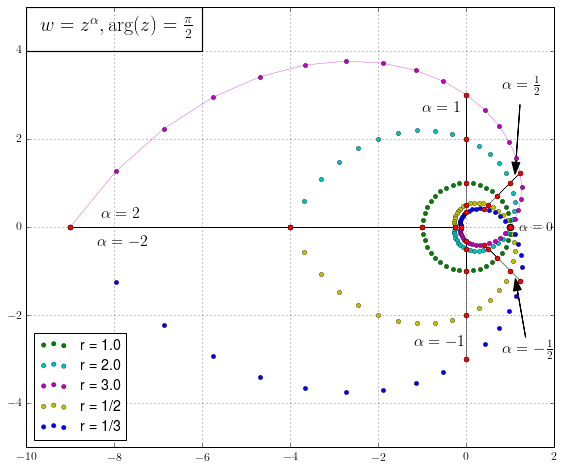

In [9]:
phi = np.pi/2
N_R = 5
a_max = 2.0
N_a = 41

fig, ax = plt.subplots(figsize=(8, 8))
ax.grid(True)

alpha = np.linspace(-a_max, a_max, N_a)
R = np.logspace(-(N_R-1)/2, (N_R-1)/2, N_R, base=2)
R = [1.0, 2.0, 3.0, Fraction(1, 2), Fraction(1, 3)]
interesting_powers = [2.0, 1.0, 0.5, 0.0, -0.5, -1.0, -2.0]
colors = ['g', 'c', 'm', 'y', 'b']

for r, color in zip(R, colors):
    points = [w((r, phi), power) for power in alpha]
    xy = np.r_[[to_xy(z) for z in points]]
    ax.scatter(xy[:, 0], xy[:, 1], lw=0.3, c=color, label='r = ' + str(r), zorder=5)
    
    if (r == 3):
        ax.plot(xy[:, 0], xy[:, 1], lw=0.3, zorder=2, c='m')
    
    # Red points
    points = [w((r, phi), power) for power in interesting_powers]
    xy = np.r_[[to_xy(z) for z in points]]
    ax.scatter(xy[:, 0], xy[:, 1], s=25, c='r', lw=0.4, zorder=6)

# Lines
for power in interesting_powers:
    points = [w((r, phi), power) for r in R]
    xy = np.r_[[to_xy(z) for z in points]]
    ax.plot(xy[:, 0], xy[:, 1], lw=0.5, c='k', zorder=3)


# Singularity
ax.scatter(1, 0, s=40, c='r', lw=1.2, zorder=6)

# Annotations
aprops = dict(facecolor='black', shrink=0.05, width=0.1, headwidth=8.0)
ax.annotate(r'$\alpha = 2$', xy=(-8, 0), xytext=(-8.3, 0.2), fontsize=16)
ax.annotate(r'$\alpha = 1$', xy=(0, 2.5), xytext=(-1, 2.6), fontsize=16)
ax.annotate(r'$\alpha = \frac{1}{2}$', xy=(1.1, 1.1), xytext=(0.8, 3), fontsize=16, arrowprops=aprops)
ax.annotate(r'$\alpha = 0$', xy=(1, 0), xytext=(1.2, -0.08), fontsize=14)
ax.annotate(r'$\alpha = -\frac{1}{2}$', xy=(1.1, -1.1), xytext=(0.8, -3), fontsize=16, arrowprops=aprops)
ax.annotate(r'$\alpha = -1$', xy=(0, -2.5), xytext=(-1.2, -2.7), fontsize=16)
ax.annotate(r'$\alpha = -2$', xy=(-8, 0), xytext=(-8.4, -0.4), fontsize=16)

# Title
rect = Rectangle((-10, 4), 4, 1, fill=False, lw=1.2, ls='-')
ax.add_patch(rect)
ax.text(-9.7, 4.3, r'$w = z^\alpha, \mathrm{arg}(z) = \frac{\pi}{2}$', fontsize=20)

ax.legend(loc='lower left')
ax.set_aspect('equal')
fig.tight_layout()
fig.savefig('ray.svg', dpi=600, bbox_inches='tight')